# Les 2 enfants

* Mr. Smith has two children. 
* At least one of them is a boy
* What is the probability that both children are boys?

# Solution 1

In [1]:
# prelude
import pandas as pd


In [7]:
def do_bayes_theorem(hypotheses, priors, likelihoods):
  df = pd.DataFrame({
      "hypothesis": hypotheses,
      "prior": priors,
      "likelihood": likelihoods,
  })
  df["posterior"] = df["prior"] * df["likelihood"]
  df["posterior"] /= df["posterior"].sum()
  return df

In [8]:
# Faire la liste de toutes les hypotheses
hypotheses = ["GG", "BB", "GB", "BG"]

# Faire la liste des a priori
# Préjugés. Jugements avant observation.
priors = [1/4, 1/4, 1/4, 1/4]

# Faire la liste des vraissemblances
# Faut supposer que l'hypothèse est vraie
# Quelle est alors la chance d'obtenir les données
likelihoods = [0, 1/3, 1/3, 1/3]
do_bayes_theorem(hypotheses, priors, likelihoods)

,hypothesis,prior,likelihood,posterior
0,GG,0.25,0.000000,0.000000
1,BB,0.25,0.333333,0.333333
2,GB,0.25,0.333333,0.333333
3,BG,0.25,0.333333,0.333333


La proba d'avoir BB est 1/3

# Solution 2

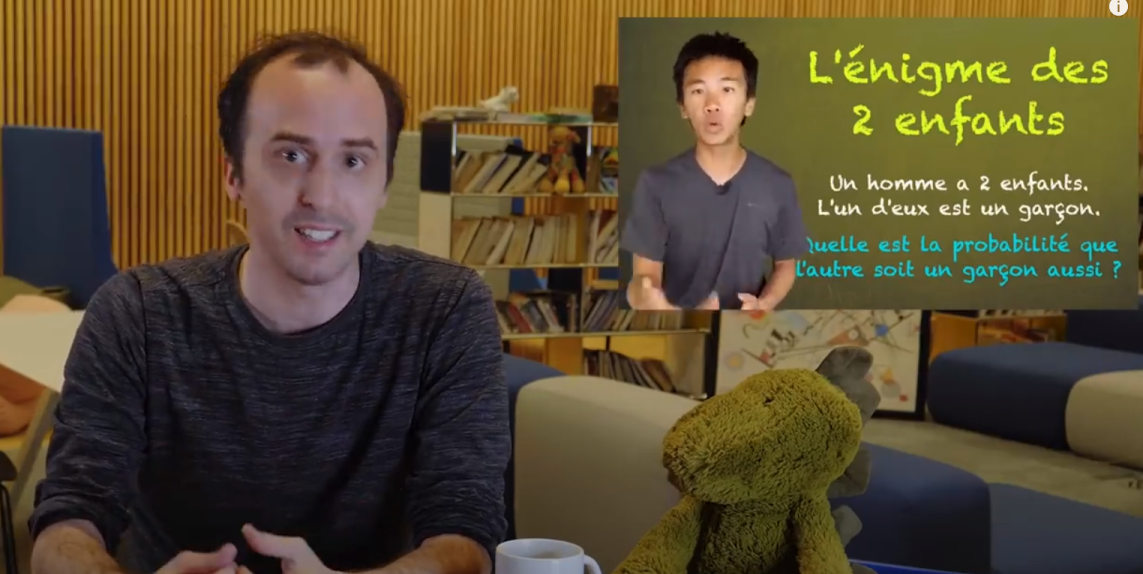



* Voir https://www.youtube.com/watch?v=8ArJN4CQs84&list=PLOmfq6wDOTY6IURPVwR1v4uxwopgGSdbn&index=15

* On fait 4 tas différents de 2 cartes, faces cachées, sur la table 
  * NN RR NR et RN

## Question :
* Si un paquet de 2 cartes contient une carte noire
* Quelle est la probabilité qu'il en contienne une seconde

## Cas 1 - Pourquoi certains répondent 1/2
* Je choisi un paquet de 2 cartes au hasard
* Je mélange les 2 cartes
* Je tire une carte
* Elle est noire
  * Je sais donc qu'il y a déjà au moins une carte noire

Quelle est la proba pour que l'autre carte soit noire aussi ?

### Une explication
* En fait il ne reste plus que 2 choix possibles pour la seconde carte
* Soit elle est noire, soit elle est rouge
* Proba = 1/2

### Bayse
* $ P(NN | N_{\text{tiré au hasard}}) = \frac{P(N_{\text{tiré au hasard}} | NN) * P(NN)} {P(N_{\text{tiré au hasard}})} $ 
  * $ P(NN | N_{\text{tiré au hasard}}) $ = probabilité que le paquet contienne NN sachant qu'on en a déjà tiré au hasard, une carte noire
  * $ P(N_{\text{tiré au hasard}} | NN) $ = probabilité que la carte tirée au hasard soit noire sachant que le paquet contient 2 cartes noires
  * $ P(NN) $ = Probabilité a priori d'avoir un paquet NN. Préjugé. Jugement avant observation.
  * $ P(N_{\text{tiré au hasard}}) $ = probabilité de tirer au hasard une carte noire

* $ P(NN | N_{\text{tiré au hasard}}) = \frac{1 * 1/4}{1/2} = 1/2 $

## Cas 2 - Pourquoi certains répondent 1/3
* Dans le premier cas je retourne une carte pour avoir l'information qu'il contient une carte noire 
* On choisi un tas au hasard
* Je ne regarde pas les cartes
* Je le montre à un tier
* Il me confirme qu'il y a une carte noire

Quelle est la proba pour que l'autre carte soit noire aussi ?

### Une explication
* On me répond oui par exemple
* Donc je sais que le paquet n'est pas RR
* Les 3 autres cas restent probables : NN, NR, RN
* Il y a 2 fois plus de chance que je sois sur un RN plutôt que sur le NN
  * 2/3 pour que la seconde carte soit R
  * 1/3 pour que la seconde carte soit N
* la réponse est 1/3 

### Bayse
* $ P(NN | Oui_{\text{N}}) = \frac{P(Oui_{\text{N}} | NN) * P(NN)} {  P(Oui_{\text{N}})        } $
  * $ P(NN | Oui_{\text{N}}) $ = probabilité que le paquet contienne NN sachant que la réponse à la question "est-ce qu'il y a une carte noire" a été oui. 
  * $ P(Oui_{\text{N}} | NN) $ = probabilité qu'on réponde "oui" à la question "est-ce qu'il y a une carte noire" si le paquet contient NN
  * $ P(NN) $ = Probabilité à priori d'avoir un paquet NN. Préjugé. Jugement avant observation.
  * $ P(Oui_{\text{N}}) $ = Probabilité qu'on réponde oui à la question "est-ce qu'il y a une carte noire". La probabilité qu'il y ait une carte noire dans un paquet. La probabilité que le paquet ne soit pas RR.

* $ P(NN | Oui_{\text{N}}) = \frac{1 * 1/4} { 3/4 } = 1/3 $




## Note 0

* On a 2 réponses car le problème ne précise pas comment on a acquit l'information
* Est ce qu'on a retourné une carte au hasard qui s'est révélée être noire ?
  * On sait que Bob a 2 enfants
  * On rencontre un des 2 enfants
  * C'est un garçon
  * 1/2
* Est ce qu'on a posé la question et on nous a répondu que l'une au moins est noire ?
  * On rencontre Bob
  * Il me dit qu'il a 2 enfants
  * Je lui demande si l'un des 2 est un garçon
  * Il répond oui
  * 1/3

Les 2 situations sont donc différentes
  * Comment as tu appris qu'il y a une carte noire ?

## Note 1
* Si je laisse la personne parlé
  * J'ai autant de chance qu'elle me parle en premier d'un garçon ou d'une fille
  * La réponse est alors 1/2

* Si je pose la question "As tu au moins un garçon parmi tes 2 enfants"
  * Alors j'ai 3 chances sur 4 d'entendre parler du garçon en premier 
  * La reponse est alors 1/3


## Note 2

### Dans le premier cas, je tire une carte sur 2
* Je sais juste que celle-là est noire
* J'attaque l'arbre par la gauche
* Il se trouve que je suis sur le premier noeud de la bonne branche (1ere carte noire)
* Il ne reste plus du'un noeud et 2 choix 
* Proba = 1/2


### Dans le second cas on nous dit si il y a au moins une carte noire
* L'interlocuteur voit les 2 cartes en même temps
* Il attaque l'arbre par la droite
* Y a 3 cas sur 4 davoir une carte noire
* Proba = 1/3

### Série vs parallèle
* Dans le premier cas on a des évènements "en série", l'un après l'autre. 
  * Le fait de tirer une première carte noire lève une partie des incertitudes. 
  * Ayant cette information il n'y a que 2 cas possibles
    * Je retroune la seconde carte : elle est rouge. 
    * Je retroune la seconde carte : elle est noire
  * Moins d'incertitudes, plus d'information => probabilité plus haute 1/2
* Dans le second cas on a moins d'information car on a une réponse générale. 
  * "Dans les 2 cartes, oui, une au moins est noire". 
  * Ayant cette information il y a bien trois cas possibles et pas 2
    * Je tire une carte : elle est rouge. Je tire la suivante elle est noire
    * Je tire une carte : elle est noire. Je tire la suivante elle est rouge
    * Je tire une carte : elle est noire. Je tire la suivante elle est noire
  * Moins d'information, plus d'incertitudes => proba plus basse 1/3

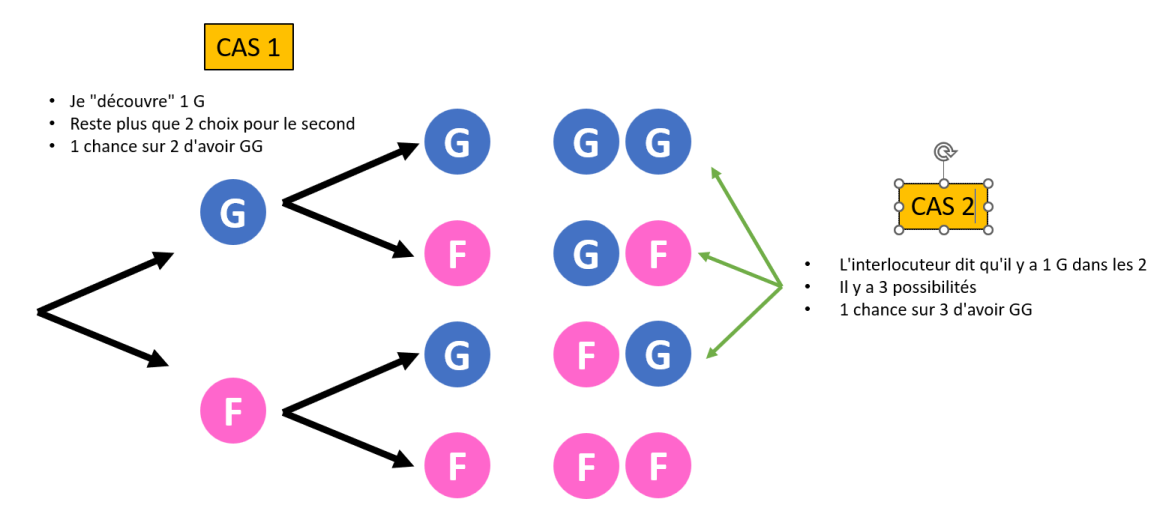

